In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitness-tracker-dataset/gym_members_exercise_tracking_synthetic_data.csv


    Age  Gender  Weight (kg)  Height (m) Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0  Female         86.7        1.86     174    152.0         74.0   
1  26.0  Female         84.7        1.83     166    156.0         73.0   
2  22.0    Male         64.8        1.85     187    166.0         64.0   
3  54.0  Female         75.3        1.82     187    169.0         58.0   
4  34.0  Female         52.8        1.74     177    169.0         66.0   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.12            712.0     Strength            12.8   
1                      1.00            833.0     Strength            27.9   
2                      1.24           1678.0       Cardio            28.7   
3                      1.45            628.0       Cardio            31.8   
4                      1.60           1286.0     Strength            26.4   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

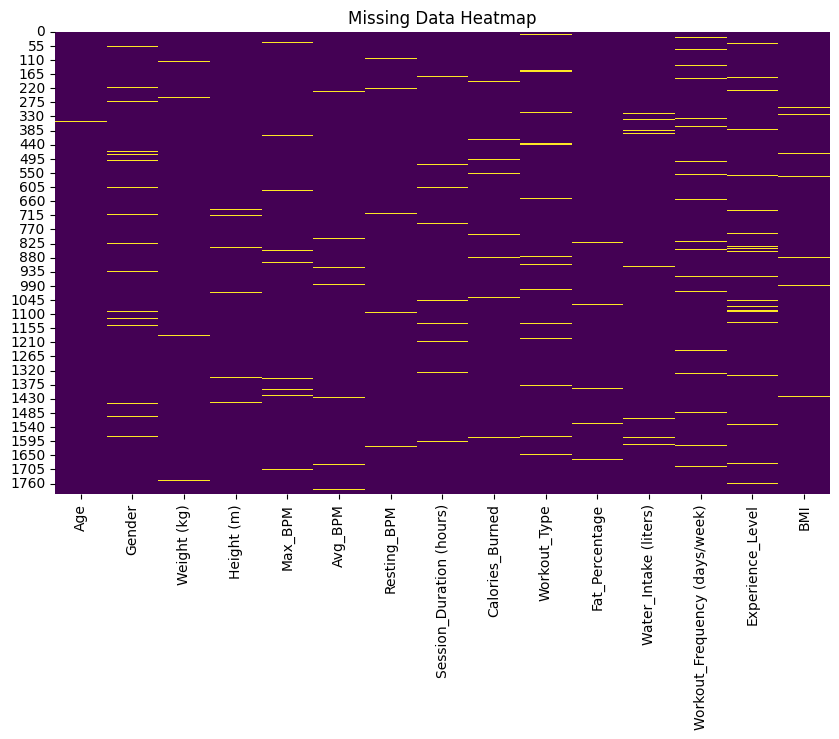

Duplicate Rows: 0


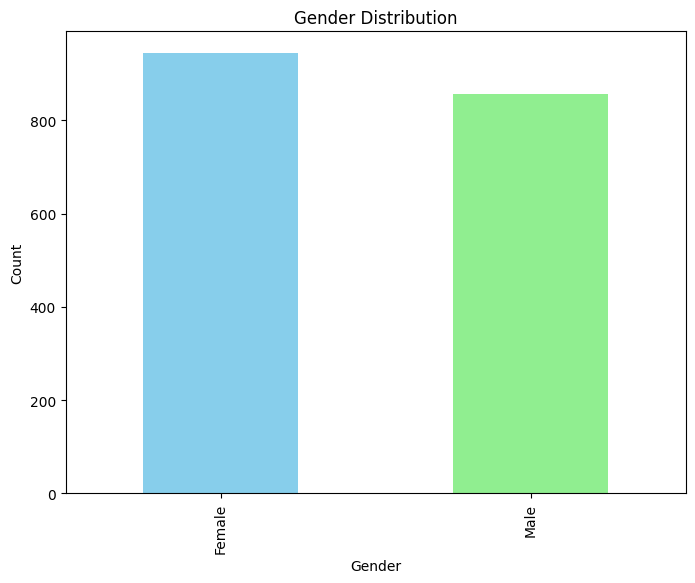

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


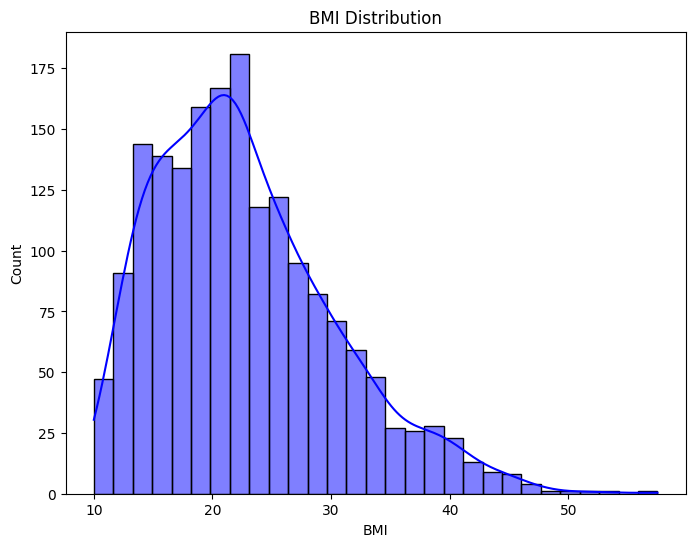

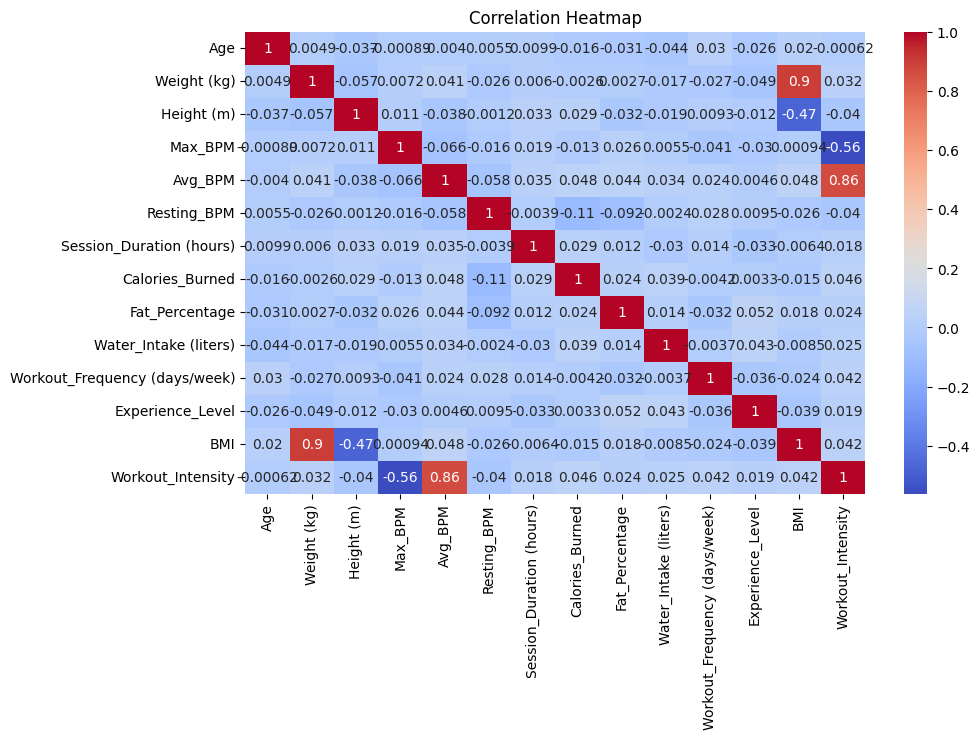

Key Insights:
- Average Age: 34.47541899441341
- Average BMI: 22.737920256476603
- Gender distribution:
 Gender
Female    943
Male      857
Name: count, dtype: int64


In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '/kaggle/input/fitness-tracker-dataset/gym_members_exercise_tracking_synthetic_data.csv'
data = pd.read_csv(data_path)

# Display dataset preview
print(data.head())

# Dataset information and basic stats
print("Shape:", data.shape)
print("Columns:", data.columns)
print(data.info())
print(data.describe())

# Missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualizing missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Handling missing values
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Weight (kg)'] = data['Weight (kg)'].fillna(data['Weight (kg)'].median())
data['Height (m)'] = data['Height (m)'].fillna(data['Height (m)'].median())
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Workout_Type'] = data['Workout_Type'].fillna(data['Workout_Type'].mode()[0])

# Checking for duplicates
duplicates = data.duplicated().sum()
print("Duplicate Rows:", duplicates)
data = data.drop_duplicates()

# Validate data types and clean invalid entries
data['Max_BPM'] = pd.to_numeric(data['Max_BPM'], errors='coerce')
data['Max_BPM'] = data['Max_BPM'].fillna(data['Max_BPM'].median())

# Standardizing categorical data
data['Gender'] = data['Gender'].replace({'M': 'Male', 'F': 'Female'})

# Create new features
data['BMI'] = data['Weight (kg)'] / (data['Height (m)'] ** 2)
data['Workout_Intensity'] = data['Avg_BPM'] / data['Max_BPM']

# Visualizations
plt.figure(figsize=(8, 6))
data['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['BMI'], kde=True, color='blue')
plt.title('BMI Distribution')
plt.show()

# Correlation heatmap - Selecting only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Summary of insights
print("Key Insights:")
print("- Average Age:", data['Age'].mean())
print("- Average BMI:", data['BMI'].mean())
print("- Gender distribution:\n", data['Gender'].value_counts())
